<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#CH-12" data-toc-modified-id="CH-12-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>CH 12</a></span><ul class="toc-item"><li><span><a href="#Ordered-categorical-outcomes" data-toc-modified-id="Ordered-categorical-outcomes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ordered categorical outcomes</a></span></li></ul></li><li><span><a href="#Misc" data-toc-modified-id="Misc-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Misc</a></span></li></ul></div>

In [2]:
library(tidyverse)
library(rethinking)
# loads experimental branch of statistical rethinking pkg
# library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.0.1       v purrr   0.3.0  
v tidyr   0.8.2       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.0.1       v forcats 0.4.0  
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::extract() masks rstan::extract()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()
x purrr::map()     masks rethinking::map()


# CH 12

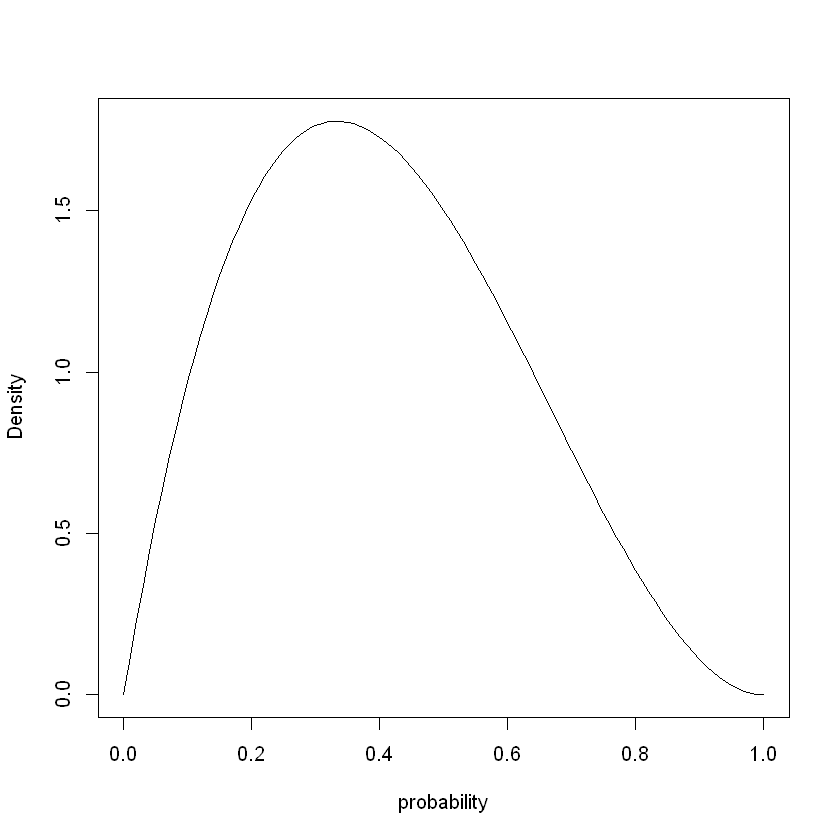

In [4]:
pbar <- 0.4
theta <- 5
curve( dbeta2(x,pbar,theta) , from=0 , to=1 ,
    xlab="probability" , ylab="Density" )

In [5]:
data(UCBadmit)
d <- UCBadmit
d$gid <- ifelse( d$applicant.gender=="male" , 1L , 2L )
dat <- list( A=d$admit , N=d$applications , gid=d$gid )

In [6]:
m12.1 <- ulam(
    alist(
        A ~ dbetabinom( N , pbar , theta ),
        logit(pbar) <- a[gid],
        a[gid] ~ dnorm( 0 , 1.5 ),
        theta ~ dexp(1)
    ), data=dat , chains=4 )


SAMPLING FOR MODEL '379c3c9629d2ce418bfe29904221f6bc' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.11 seconds (Warm-up)
Chain 1:                0.088 seconds (Sampling)
Chain 1:                0.1

In [8]:
## R code 12.3
post <- extract.samples( m12.1 )
post$da <- post$a[,1] - post$a[,2]
precis( post , depth=2 )[1:4]

,mean,sd,5.5%,94.5%
a[1],-0.4221755,0.4363855,-1.1172937,0.2858072
a[2],-0.3002211,0.4202903,-0.9702082,0.3600066
theta,2.7131859,0.9705717,1.4313366,4.4575013
da,-0.1219544,0.6086959,-1.0690071,0.8587840


In [9]:
data(Kline)
d <- Kline
d$P <- standardize( log(d$population) )
d$contact_id <- ifelse( d$contact=="high" , 2L , 1L )

dat2 <- list(
    T = d$total_tools,
    P = d$population,
    cid = d$contact_id )

m12.3 <- ulam(
    alist(
        T ~ dgampois( lambda , phi ),
        lambda <- exp(a[cid])*P^b[cid] / g,
        a[cid] ~ dnorm(1,1),
        b[cid] ~ dexp(1),
        g ~ dexp(1),
        phi ~ dexp(1)
    ), data=dat2 , chains=4 , log_lik=TRUE )


SAMPLING FOR MODEL '1b1b1ec6a021defe7ac1cbee74458ec5' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.543 seconds (Warm-up)
Chain 1:                0.43 seconds (Sampling)
Chain 1:                0.9

In [10]:
# define parameters
prob_drink <- 0.2 # 20% of days
rate_work <- 1 # average 1 manuscript per day

# sample one year of production
N <- 365

# simulate days monks drink
set.seed(365)
drink <- rbinom( N , 1 , prob_drink )

# simulate manuscripts completed
y <- (1-drink)*rpois( N , rate_work )

In [16]:
drink %>% sum

[1] 75

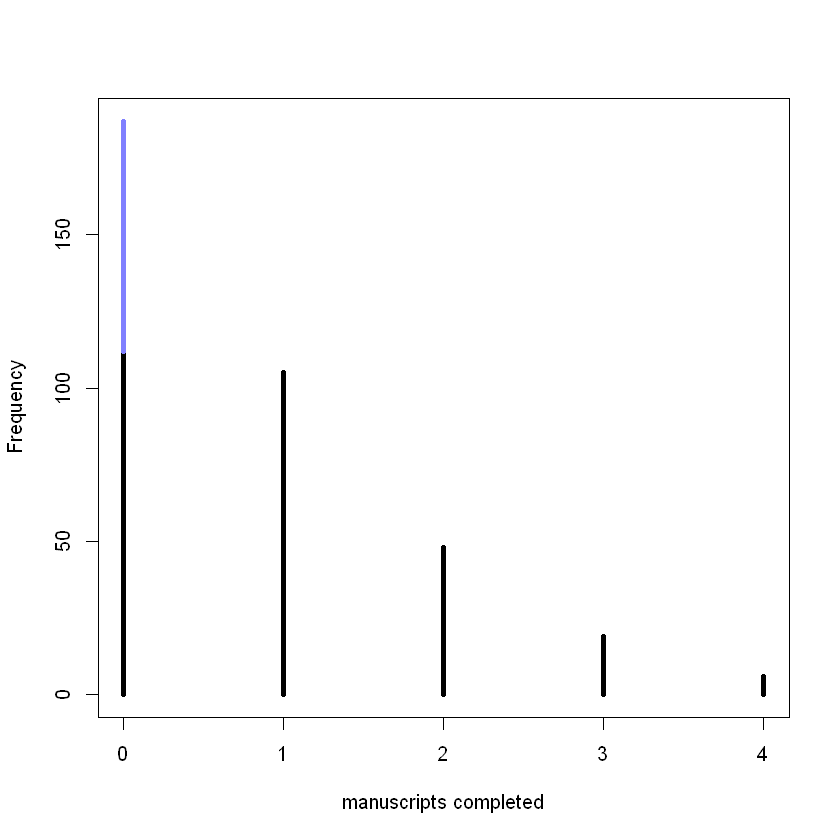

In [18]:
simplehist( y , xlab="manuscripts completed" , lwd=4 )
zeros_drink <- sum(drink)
zeros_work <- sum(y==0 & drink==0)
zeros_total <- sum(y==0)
lines( c(0,0) , c(zeros_work,zeros_total) , lwd=4 , col=rangi2 )

## Ordered categorical outcomes

In [ ]:
# library(rethinking)
data(Trolley)
d <- Trolley

In [3]:
d %>% head

case,response,order,id,age,male,edu,action,intention,contact,story,action2
cfaqu,4,2,96;434,14,0,Middle School,0,0,1,aqu,1
cfbur,3,31,96;434,14,0,Middle School,0,0,1,bur,1
cfrub,4,16,96;434,14,0,Middle School,0,0,1,rub,1
cibox,3,32,96;434,14,0,Middle School,0,1,1,box,1
cibur,3,4,96;434,14,0,Middle School,0,1,1,bur,1
cispe,3,9,96;434,14,0,Middle School,0,1,1,spe,1


# Misc

In [4]:
data(bangladesh)
d <- bangladesh
d %>% head

woman,district,use.contraception,living.children,age.centered,urban
1,1,0,4,18.4400,1
2,1,0,1,-5.5599,1
3,1,0,3,1.4400,1
4,1,0,4,8.4400,1
5,1,0,1,-13.5590,1
6,1,0,1,-11.5600,1
